# SVD

## Introduction
Singular value decomposition is similar to eigen value decomposition in the sense that it yields orthonormal bases and values associated with the matrix at hand. It is more genral as it applies to rectangular matrices. For any matrix $A \in \mathbb{R}^{n \times m}$, it reads
$$A=U\Sigma V^T$$
where $U \in \mathbb{R}^{n \times n}$, $\Sigma$ is a diagonal matrix of the same size of A and $V \in \mathbb{R}^{m \times m}$, $\Sigma$. $U$ and $V$ are orthonormal matrices which columns are bases of the spaces associated with each dimension of A.

### SVD based approximation

By construction (see literature), SVD provides the best rank $k$ approximation of matrix A in the sense of $L^2$ norm. Indeed, the singular values $\sigma_i$ are sorted in a decreasing order i.e. $\forall j>i, \sigma_i>\sigma_j$. Then, we have
$$A\approx A_k = \sum_{i=0}^k \sigma_i u_i \otimes v_i$$

### SVD is related to EVD

Given the properties of the SVD, we can see that it is possible to solve an EVD problem that is equivalent to solve SVD. Indeed,
$$AA^T=U\Sigma V^T V \Sigma U^T =U\Sigma^2 U^T  $$ which means U and $\Sigma^2$ are the solution of the EVD of $AA^T$.

The same can be done with $A^TA=V\Sigma^2V^T$. Then one can take advantage of the size of the problem if $n >> m$ or the opposite. This also allows one to use the so called power iteration method to compute only the first few modes of the SVD.

### Computing SVD
There are multiple algorithms to cumpute SVD of both dense and sparse matrices. Most languages compatible with scientific computing (python, mathlab, C++, fotran,...) have highly efficient libraries to compute SVD on a single machine. Used well, they can use multi-core units and GPUs when available.

Alternatively, one will be able to use EVD solvers when the problem is suitable.

In case of very large matrices, one will have to use more advanced method to solve the problem. 

## Exercice

With the programming language of your choice (python/matlab recommended), solve the following exercice.

1. For a function that can be either $f(x,y)=xy$ or $f(x,y)=\sin(\sqrt{x^2+y^2})$, create a 50 by 200 sampling grid on the unit domain $[0,1]\times [0,1]$ and fill a matrix with the values. Then visualize the matrix using the software of your choice.

In [1]:
import numpy as np

In [2]:
# define f(x,y)=xy
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
# define a grid with 50 points in x direction and 200 in y direction between [0 and 1]
x=np.linspace(0,1,50)
y=np.linspace(0,1,200)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator
# define a grid with 50 points in x direction and 200 in y direction between [0 and 1]
x=np.linspace(0,1,50)
y=np.linspace(0,1,200)
X, Y = np.meshgrid(x, y)
A = f(X,Y)

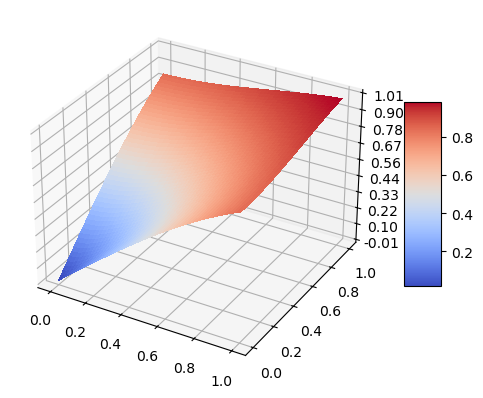

In [4]:
# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, A, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

2. Apply direct SVD from a computing library compatible with (or embedded in) your language. You will have to find out what's the basic computing library used, which algorithm is called and briefly describe its algorithm with pros and cons. 

In [5]:
U,Sigma,Vtranspose=np.linalg.svd(A)

In [6]:
S=np.zeros_like(A)
for i in range(Sigma.size):
    S[i,i]=Sigma[i]

In [7]:
Approx=U@S@Vtranspose

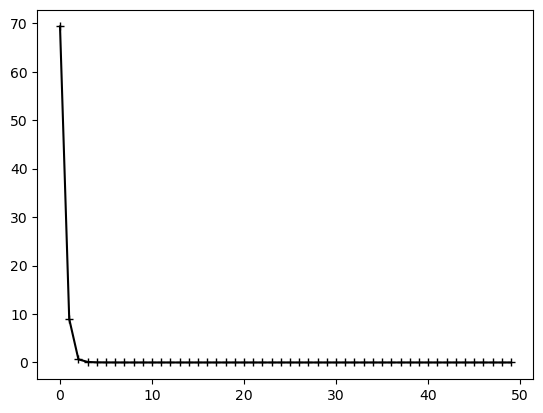

In [8]:
plt.plot(Sigma,'+-k')

3. Compute approximation error (L2) defined as $E(A,A_k)=\frac{||A-A_k||_{L^2}}{||A||_{L^2}}$ with various truncation rank. 

In [9]:
def err_L2(A,Approx):
    return np.linalg.norm(A-Approx)/np.linalg.norm(A)

err_L2(A,Approx)

7.984662466205968e-16

In [10]:
def truncate(U,Sigma,Vtranspose,rank=None):
    if rank is None:
        rank=Sigma.size
    return U[:,:rank],Sigma[:rank],Vtranspose[:rank,:]

In [11]:
def eval_approx(U,Sigma,Vtranspose,rank=None):
    u,s,vt=truncate(U,Sigma,Vtranspose,rank)
    s=np.diag(s)
    return u@s@vt

4. Plot the error vs $k$ graph

In [12]:
def approx_error_plot(A,U,Sigma,Vtranspose):
    errors=[]
    for k in range(1,Sigma.size):
        Approx=eval_approx(U,Sigma,Vtranspose,k)
        errors.append(err_L2(A,Approx))
        if errors[-1]<1e-15: break

    plt.plot(errors,'+k')
    plt.yscale('log')
    plt.ylabel("$E_{L^2}$")
    plt.xlabel("Truncation rank")
    plt.xlim([0,len(errors)])
    plt.grid()
    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    plt.title("Truncated SVD approximation L2 error",size=14)
    return errors

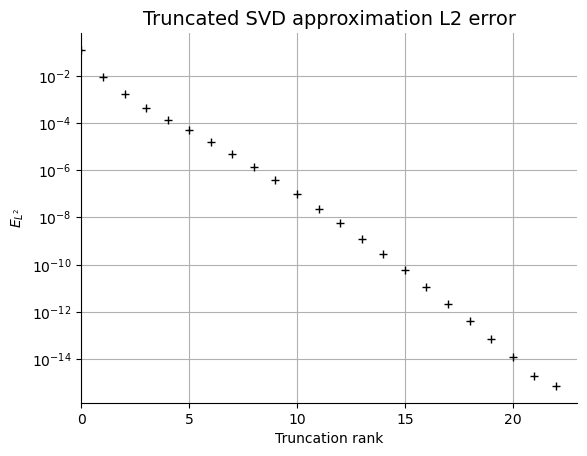

In [13]:
errs=approx_error_plot(A,U,Sigma,Vtranspose)

5. Redo the exercice with a large image of your choice after converting it to grayscale. 

In [14]:
import PIL

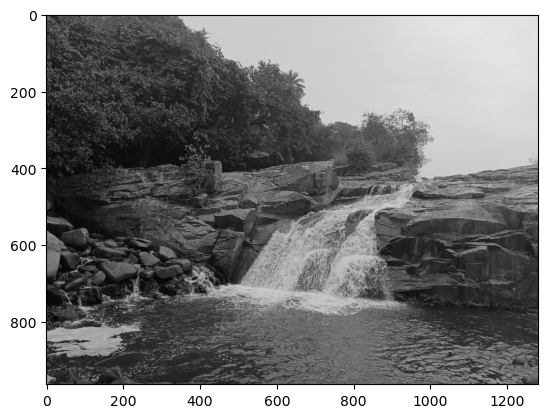

In [15]:
img = PIL.Image.open("waterfall.jpg")
gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')

In [16]:
mat=np.asarray(gray_img)

In [17]:
U,Sigma,Vtranspose=np.linalg.svd(mat)

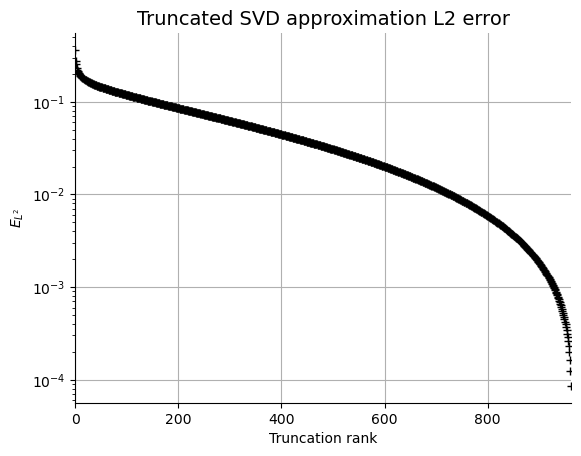

In [18]:
errs=approx_error_plot(mat,U,Sigma,Vtranspose)

Here, we observe very different behaviour, with the error diminishing slowly without reaching satisfying level. Let's plot a few reconstrutions to get a better feel.

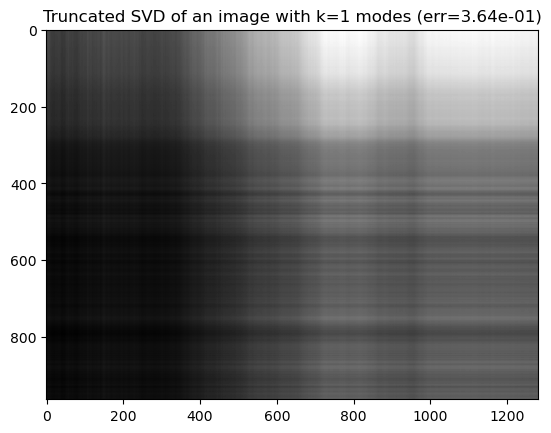

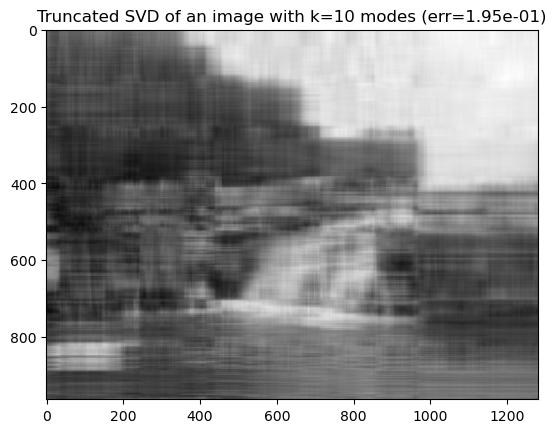

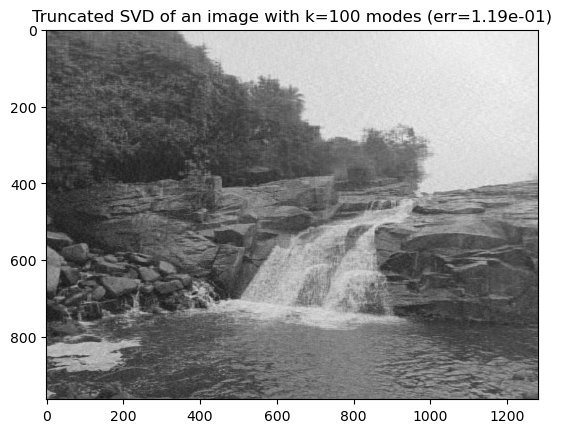

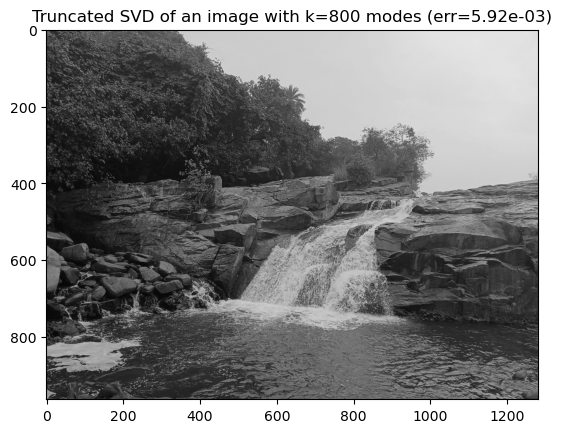

In [19]:
for k in [1,10,100,800]:
    Approx=eval_approx(U,Sigma,Vtranspose,k)
    plt.imshow(Approx, cmap='gray')
    plt.title(f"Truncated SVD of an image with {k=} modes (err={err_L2(mat,Approx):.2e})")
    plt.show()

**6. Add a timer to the SVD call and compare the algorithm based on EVD.**

Let's recall we can use an eigen value decomposition of a so called **correlation** matrix ($A^TA$ or $AA^T$) to obtain the SVD of A.

In [26]:
def svd_by_evd(F):
    """
    Compute the Singular Value Decomposition (SVD) of a matrix F by solving the Eigenvalue Decomposition (EVD) problem on F.T F or F F.T.

    Parameters:
    F (numpy.ndarray): The input matrix to decompose.

    Returns:
    phi (numpy.ndarray): The left singular vectors of the SVD.
    sigma (numpy.ndarray): The singular values of the SVD.
    U (numpy.ndarray): The right singular vectors of the SVD.

    Note:
    The function chooses the smallest dimension of F to perform EVD. If the number of columns is greater than the number of rows, the function transposes F before computing the EVD.
    """
    
    # picking the smallest dimension to perform EVD.
    shape=F.shape
    Transposed_POD=False
    if shape[1]>shape[0]:
        F=F.T
        Transposed_POD=True

    #Computing the correlation matrix
    C=F.T@F
    Lambda , U =np.linalg.eigh(C)

    # Reversing order (because of eigh default)
    Lambda = Lambda[::-1]
    U=U[::,::-1]

    # recover sigma
    sigma=np.sqrt(Lambda)
    
    #Sanity check
    if np.isnan(sigma).any():
        #print(Lambda)
        print("EVD returns negative number leading to nan \
              in sigma going to shorten")

    r=sigma.size
    inv_sigma=np.reshape(1/sigma,(r,1))

    #Computing missing side of SVD
    phi=F@(inv_sigma*U.T).T
    return phi, sigma, U

In [27]:
@timeit U,Sigma,Vtranspose=svd_by_evd(mat)

SyntaxError: invalid syntax (3478073363.py, line 1)

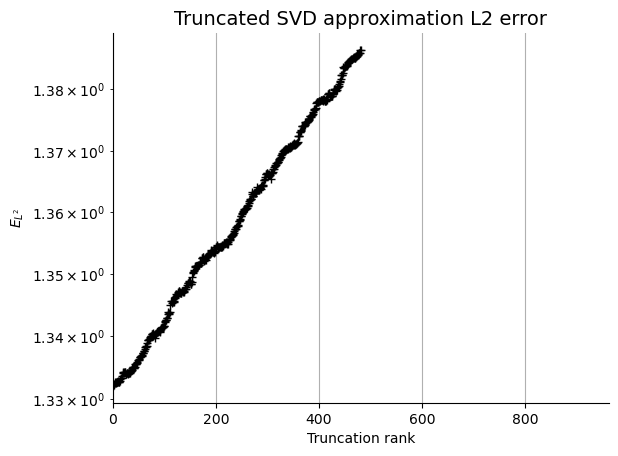

In [25]:
errs=approx_error_plot(mat.T,U,Sigma,Vtranspose)

In [ ]:
@timeit U,Sigma,Vtranspose=np.linalg.svd(mat)